In [1]:
import json
import numpy as np
import pandas as pd
import glob
import os

import matplotlib.pyplot as plt
import seaborn as sns

from dredFISH.Analysis.__init__plots import *
from dredFISH.Analysis import basicu 
# from dredFISH.Analysis import powerplots
# from dredFISH.Design.model import *
# from dredFISH.Design.allen_data_iterators import DataIterCached

In [2]:
f = '/bigstore/binfo/mouse/Brain/DRedFISH/Allen_V3_Reference' + '/10X/genes.npy' 
tenx_genes = np.load(f)
f = '/bigstore/binfo/mouse/Brain/DRedFISH/Allen_V3_Reference' + '/SmartSeq/genes.npy' 
smrt_genes = np.load(f)

np.all(tenx_genes == smrt_genes)

genes = tenx_genes
genes.shape

(10861,)

In [3]:
rootdat_dir = '/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/' 
!ls $rootdat_dir

# fig_dir = '/bigstore/GeneralStorage/fangming/projects/dredfish/figures'

00_test_recon		     06-gene140			    07-v2-crse-drprt0.2
01_test_recon		     06-gene140_lmd01.00e-01	    07-v2-crse-drprt0.3
02-2_reduced_class_longiter  06-gene140_lmd01.00e+01	    07-v2-crse-drprt0.4
02_reduced_class	     06-gene140_lmd01.00e-03	    07-v2-crse-drprt0.5
03-1_gpu		     06-gene140_lmd01.00e+03	    07-v2-crse-drprt0.6
03-2_cpu		     06-gene140_lmd01.00e-05	    07-v2-crse-drprt0.7
04-1_gpu		     06-gene140_lmd01.00e+05	    07-v2-crse-drprt0.8
04-2_cpu		     06-v3-simple-gene140_1.00e+00  07-v2-crse-drprt0.9
05-1_drprt0.0		     06-v3-simple-gene140_1.00e-05  07-v2-fine-drprt0.0
05-1_drprt0.1		     06-v3-simple-gene140_1.00e+05  07-v2-fine-drprt0.1
05-1_drprt0.2		     06-v4-gene140_lmd01.00e+00     07-v2-fine-drprt0.2
05-1_drprt0.3		     06-v4-gene140_lmd01.00e-05     07-v2-fine-drprt0.3
05-1_drprt0.4		     06-v4-gene140_lmd01.00e+05     07-v2-fine-drprt0.4
05-1_drprt0.5		     06-v5-gene140_lmd01.00e+05     07-v2-fine-drprt0.5
05-1_drprt0.6		     07-crse			    07-v2-fine-dr

In [4]:
dat_dir = rootdat_dir + '07-v2-fine-drprt0.9'
!ls $dat_dir

'embmat=max-half_nrml-90000.0-2.00E+05-24-0.9-1.00E-10-0.01-1.0.json'
'model=max-half_nrml-90000.0-2.00E+05-24-0.9-1.00E-10-0.01-1.0.pt'
'result=max-half_nrml-90000.0-2.00E+05-24-0.9-1.00E-10-0.01-1.0.json'


In [5]:
## NN pm
f = glob.glob(os.path.join(dat_dir, 'embmat=*'))[0]

with open(f, 'r') as fh:
    embmat = np.array(json.load(fh))
    print(embmat.shape)
pmat = pd.DataFrame(embmat, index=genes)

(10861, 24)


In [6]:
# stats
f = glob.glob(os.path.join(dat_dir, 'result*'))[0]
with open(f, 'r') as fh:
    res = json.load(fh)
print(res['0'].keys())

# get stats processed
_x = []
_y1 = []
_y2 = []
_y3 = []
_y4 = []
for _iter in res.keys():
    _x.append(_iter)
    # _y1.append(np.mean([val for key, val in res[_iter]['smrt_crse_acc'].items()]))
    # _y2.append(np.mean([val for key, val in res[_iter]['tenx_crse_acc'].items()]))
    _y3.append(np.mean([val for key, val in res[_iter]['smrt_fine_acc'].items()]))
    _y4.append(np.mean([val for key, val in res[_iter]['tenx_fine_acc'].items()]))
_x = np.array(_x).astype(int)

dict_keys(['smrt_fine_acc', 'smrt_mrgn_lss', 'tenx_fine_acc', 'tenx_mrgn_lss', 'dsc_lss', 'row_cnst'])


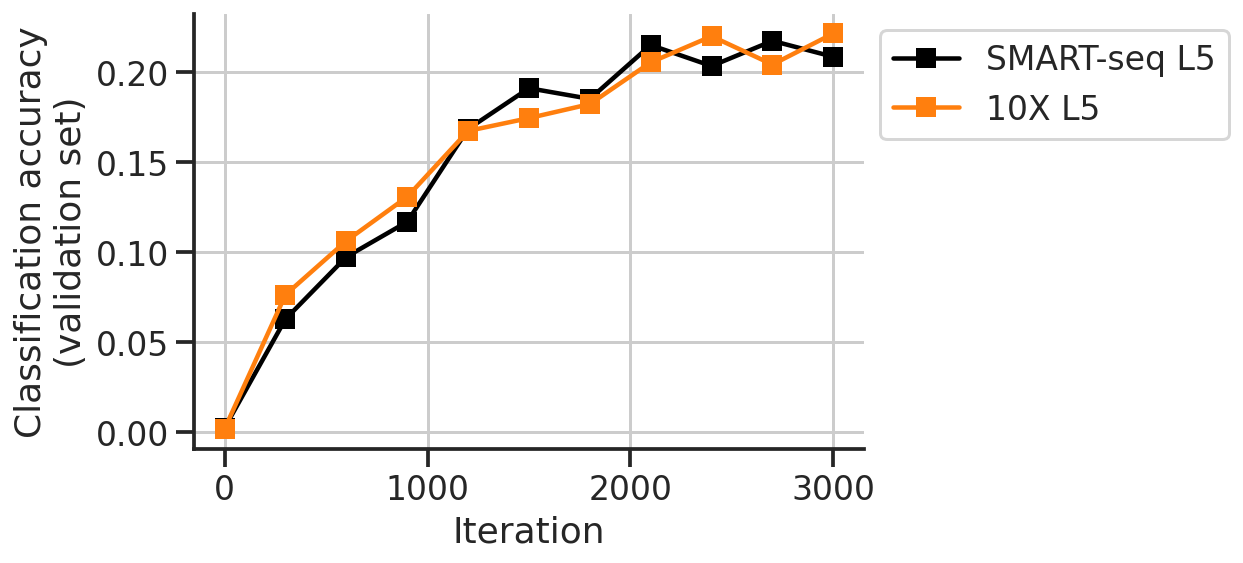

In [7]:
fig, ax = plt.subplots()
# ax.plot(_x, _y1, '-o', color='k', label='SMART-seq L3')
# ax.plot(_x, _y2, '-o', color='C1', label='10X L3' )
ax.plot(_x, _y3, '-s', color='k', label='SMART-seq L5')
ax.plot(_x, _y4, '-s', color='C1', label='10X L5' )
ax.set_xlabel('Iteration')
ax.set_ylabel('Classification accuracy\n(validation set)')
ax.legend(bbox_to_anchor=(1,1))
sns.despine(ax=ax)
# powerplots.savefig_autodate(fig, os.path.join(fig_dir, "NN_classification_acc.pdf"))
plt.show()

# go across many dropouts

In [8]:
# !ls $dat_dir
stats = {}
for i in np.arange(0, 1, 0.1):
    dat_dir = rootdat_dir + f'07-v2-fine-drprt{i:.1f}'
    print(dat_dir)
    
    # stats
    f = glob.glob(os.path.join(dat_dir, 'result*'))[0]
    with open(f, 'r') as fh:
        res = json.load(fh)

    # get stats processed
    _x = []
    # _y1 = []
    # _y2 = []
    _y3 = []
    _y4 = []
    for _iter in res.keys():
        _x.append(_iter)
        # _y1.append(np.mean([val for key, val in res[_iter]['smrt_crse_acc'].items()]))
        # _y2.append(np.mean([val for key, val in res[_iter]['tenx_crse_acc'].items()]))
        _y3.append(np.mean([val for key, val in res[_iter]['smrt_fine_acc'].items()]))
        _y4.append(np.mean([val for key, val in res[_iter]['tenx_fine_acc'].items()]))
    _x = np.array(_x).astype(int)
    
    key = f'{i:.1f}'
    stats[key] = [_x, _y3, _y4]

/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/07-v2-fine-drprt0.0
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/07-v2-fine-drprt0.1
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/07-v2-fine-drprt0.2
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/07-v2-fine-drprt0.3
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/07-v2-fine-drprt0.4
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/07-v2-fine-drprt0.5
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/07-v2-fine-drprt0.6
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/07-v2-fine-drprt0.7
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/07-v2-fine-drprt0.8
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/07-v2-fine-drprt0.9


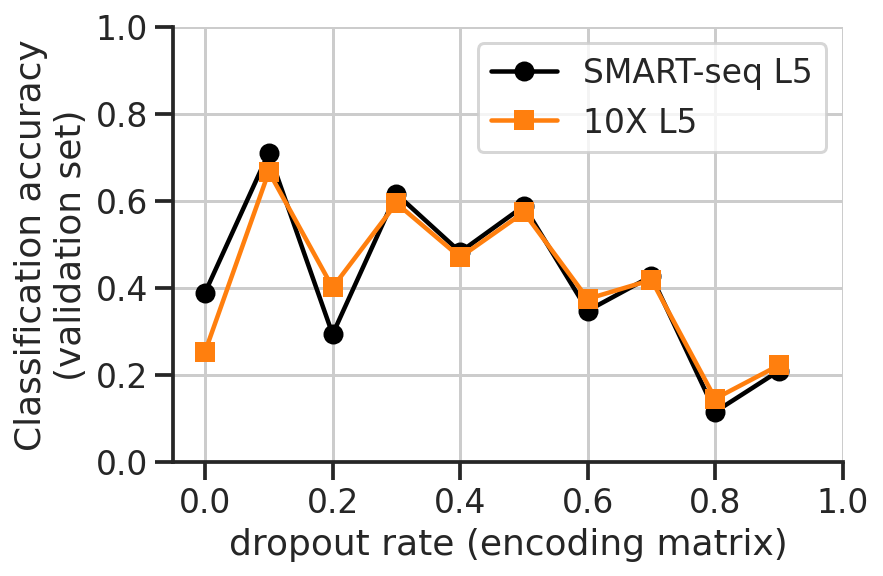

In [9]:
y1_cmb = []
y2_cmb = []
y3_cmb = []
y4_cmb = []
drprts = []
for drprt, vals in stats.items():
    _x, _y3, _y4 = vals
    drprts.append(float(drprt))
    # y1_cmb.append(_y1[-1])
    # y2_cmb.append(_y2[-1])
    y3_cmb.append(_y3[-1])
    y4_cmb.append(_y4[-1])
    

fig, ax = plt.subplots()
# ax.plot(drprts, y1_cmb, '-o', color='k', label='SMART-seq L3')
# ax.plot(drprts, y2_cmb, '-o', color='C1', label='10X L3' )

ax.plot(drprts, y3_cmb, '-o', color='k', label='SMART-seq L5')
ax.plot(drprts, y4_cmb, '-s', color='C1', label='10X L5' )
    
ax.set_xlim([-0.05,1])
ax.set_ylim([0,1])
# ax.grid(False)
ax.set_xlabel('dropout rate (encoding matrix)')
ax.set_ylabel('Classification accuracy\n(validation set)')
ax.legend(bbox_to_anchor=(1,1))
sns.despine(ax=ax)
# powerplots.savefig_autodate(fig, os.path.join(fig_dir, "NN_classification_acc.pdf"))
plt.show()

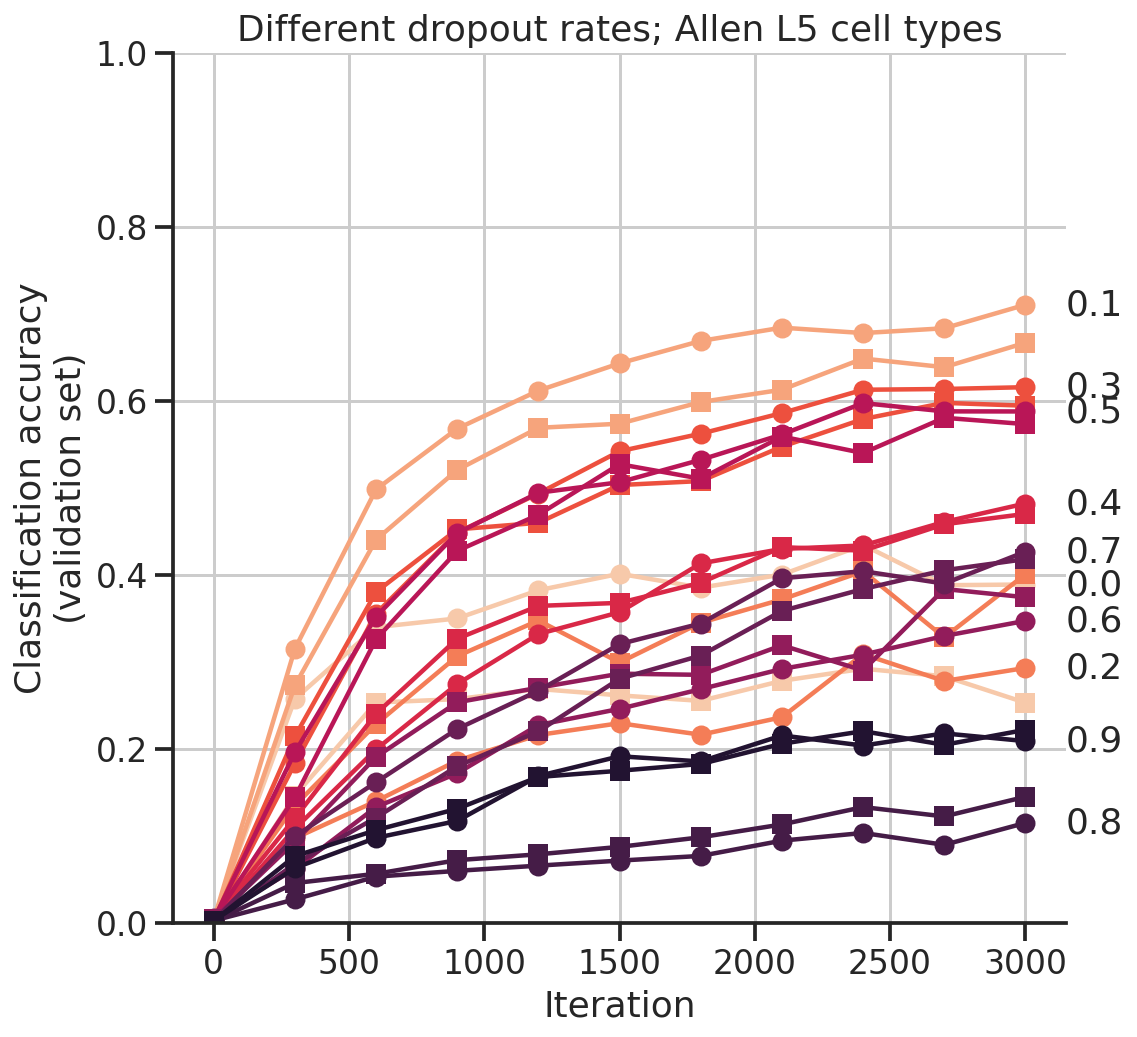

In [10]:
colors = sns.color_palette('rocket_r', n_colors=10)

fig, ax = plt.subplots(figsize=(8,8))
for i, (drprt, vals) in enumerate(stats.items()):
    _x, _y3, _y4 = vals
    drprts.append(float(drprt))
    
    ax.plot(_x, _y3, '-o', color=colors[i],) # SMART
    ax.plot(_x, _y4, '-s', color=colors[i],) # 10X
    ax.text(1.05*_x[-1], _y3[-1], drprt, va='center')
ax.set_ylim([0,1])
    
ax.set_title('Different dropout rates; Allen L5 cell types')
ax.set_xlabel('Iteration')
ax.set_ylabel('Classification accuracy\n(validation set)')
    
sns.despine(ax=ax)
plt.show()
    

# go across many dropouts (coarse)

In [11]:
# !ls $dat_dir
stats = {}
for i in np.arange(0, 1, 0.1):
    dat_dir = rootdat_dir + f'07-v2-crse-drprt{i:.1f}'
    print(dat_dir)
    
    # stats
    f = glob.glob(os.path.join(dat_dir, 'result*'))[0]
    with open(f, 'r') as fh:
        res = json.load(fh)

    # get stats processed
    _x = []
    # _y1 = []
    # _y2 = []
    _y3 = []
    _y4 = []
    for _iter in res.keys():
        _x.append(_iter)
        # _y1.append(np.mean([val for key, val in res[_iter]['smrt_crse_acc'].items()]))
        # _y2.append(np.mean([val for key, val in res[_iter]['tenx_crse_acc'].items()]))
        _y3.append(np.mean([val for key, val in res[_iter]['smrt_fine_acc'].items()]))
        _y4.append(np.mean([val for key, val in res[_iter]['tenx_fine_acc'].items()]))
    _x = np.array(_x).astype(int)
    
    key = f'{i:.1f}'
    stats[key] = [_x, _y3, _y4]

/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/07-v2-crse-drprt0.0
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/07-v2-crse-drprt0.1
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/07-v2-crse-drprt0.2
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/07-v2-crse-drprt0.3
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/07-v2-crse-drprt0.4
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/07-v2-crse-drprt0.5
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/07-v2-crse-drprt0.6
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/07-v2-crse-drprt0.7
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/07-v2-crse-drprt0.8
/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/07-v2-crse-drprt0.9


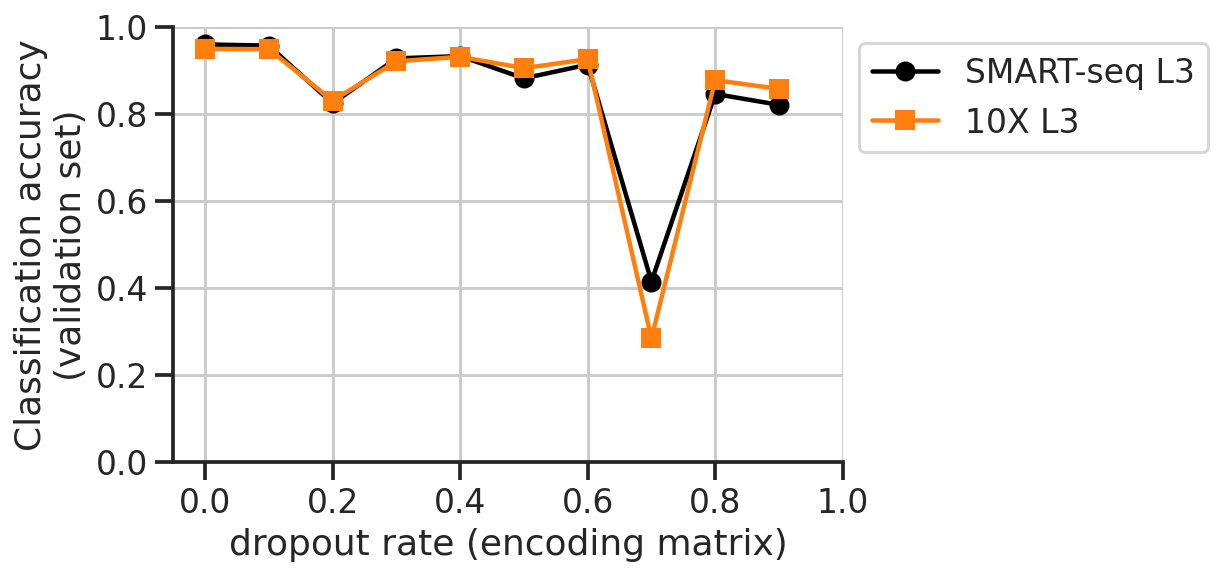

In [12]:
y1_cmb = []
y2_cmb = []
y3_cmb = []
y4_cmb = []
drprts = []
for drprt, vals in stats.items():
    _x, _y3, _y4 = vals
    drprts.append(float(drprt))
    # y1_cmb.append(_y1[-1])
    # y2_cmb.append(_y2[-1])
    y3_cmb.append(_y3[-1])
    y4_cmb.append(_y4[-1])
    

fig, ax = plt.subplots()
# ax.plot(drprts, y1_cmb, '-o', color='k', label='SMART-seq L3')
# ax.plot(drprts, y2_cmb, '-o', color='C1', label='10X L3' )

ax.plot(drprts, y3_cmb, '-o', color='k', label='SMART-seq L3')
ax.plot(drprts, y4_cmb, '-s', color='C1', label='10X L3' )
ax.set_ylim([0,1])
    
ax.set_xlim([-0.05,1])
ax.set_xlabel('dropout rate (encoding matrix)')
ax.set_ylabel('Classification accuracy\n(validation set)')
ax.legend(bbox_to_anchor=(1,1))
sns.despine(ax=ax)
# powerplots.savefig_autodate(fig, os.path.join(fig_dir, "NN_classification_acc.pdf"))
plt.show()

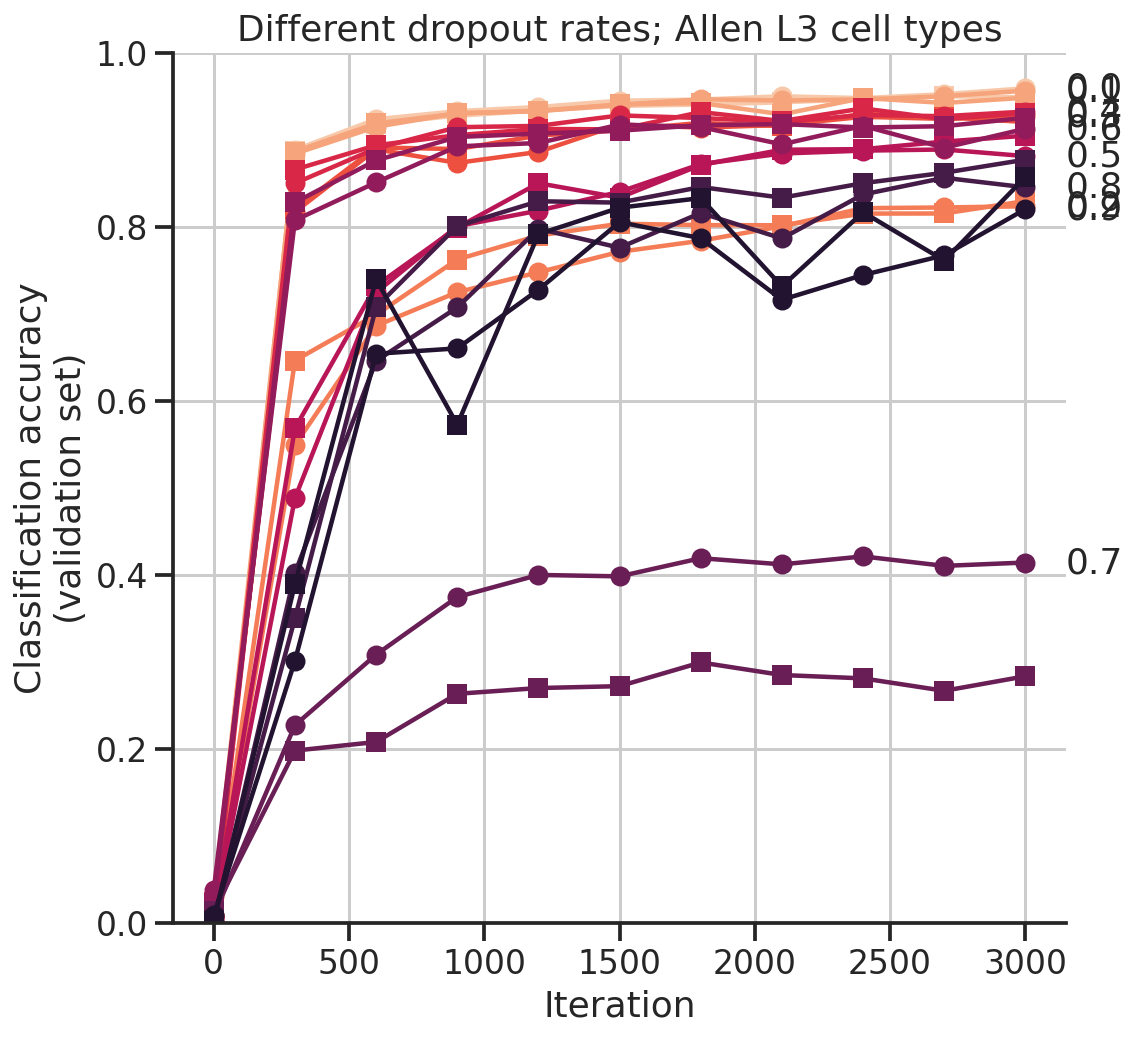

In [13]:
colors = sns.color_palette('rocket_r', n_colors=10)

fig, ax = plt.subplots(figsize=(8,8))
for i, (drprt, vals) in enumerate(stats.items()):
    _x, _y3, _y4 = vals
    drprts.append(float(drprt))
    
    ax.plot(_x, _y3, '-o', color=colors[i],) # SMART
    ax.plot(_x, _y4, '-s', color=colors[i],) # 10X
    ax.text(1.05*_x[-1], _y3[-1], drprt, va='center')
    
ax.set_ylim([0,1])
ax.set_title('Different dropout rates; Allen L3 cell types')
ax.set_xlabel('Iteration')
ax.set_ylabel('Classification accuracy\n(validation set)')
    
sns.despine(ax=ax)
plt.show()
    

# check how encoding matrix evolve

In [14]:
pm = sns.color_palette('husl', n_colors=24)
pm

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9699521567340649, 0.4569882390259858, 0.36385324448493633),
 (0.903599057664843, 0.511987276335809, 0.19588350060161624),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.6666319352625271, 0.6197366714155128, 0.19396267878823373),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.49382662140640926, 0.6649121332643736, 0.19300804648700284),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.20312757197899856, 0.6881249249803418, 0.5177618167447304),
 (0.20703735729643508, 0.6824290013722435, 0.5885318893529169),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21387918628643265, 0.6720135434784761, 0.693961140878689),
 (0.21786710662428366, 0.6656671601322255, 0.7482809385065813),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.4768773964929644, 0.5974418160509446, 0.9584992622400258),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.774710828527837, 0.49133823414365724, 0.9580114121137316),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491),
 (0.9633321742064956, 0.40643825645731757, 0.7592537599568671),
 (0.9656056642634557, 0.4245907603266889, 0.6579786740552919)]

In [15]:
!ls $dat_dir

'embmat=max-half_nrml-90000.0-2.00E+05-24-0.9-1.00E-10-0.01-1.0.json'
'model=max-half_nrml-90000.0-2.00E+05-24-0.9-1.00E-10-0.01-1.0.pt'
'result=max-half_nrml-90000.0-2.00E+05-24-0.9-1.00E-10-0.01-1.0.json'


In [16]:
## NN pmat
drprts = np.linspace(0,1,11)[:-1]
pmats = {}
for drprt in drprts:
    dat_dir = rootdat_dir + f'05-1_drprt{drprt:.1f}'
    # embmat
    f = glob.glob(os.path.join(dat_dir, 'embmat*'))[0]
    with open(f, 'r') as fh:
        embmat = np.array(json.load(fh))
        print(embmat.shape)

    pmat = pd.DataFrame(embmat, index=genes)
    pmats[f'{drprt:.1f}'] = pmat

(10861, 24)
(10861, 24)
(10861, 24)
(10861, 24)
(10861, 24)
(10861, 24)
(10861, 24)
(10861, 24)
(10861, 24)
(10861, 24)


In [17]:
num_g = []
num_p = []
mnum_g = []
for drprt, pmat in pmats.items():
    _num_g = (pmat.sum(axis=1) > 0).sum()
    _mnum_g = (pmat>0).sum(axis=0).mean()
    _num_p = pmat.sum().sum()
    num_g.append(_num_g)
    mnum_g.append(_mnum_g)
    num_p.append(_num_p)
    
    print(
        drprt, 
        (pmat.sum(axis=1) == 0).sum(), 
        _num_g, _num_p, _mnum_g,
        )

0.0 8128 2733 89808.0 241.83333333333334
0.1 7912 2949 89637.0 310.75
0.2 8112 2749 89636.0 249.66666666666666
0.3 7630 3231 89530.0 362.625
0.4 7346 3515 89434.0 403.2916666666667
0.5 7183 3678 89507.0 421.625
0.6 6690 4171 89298.0 529.25
0.7 6417 4444 89189.0 583.875
0.8 7604 3257 89713.0 243.0
0.9 5187 5674 88781.0 775.125


(-0.05, 1.0)

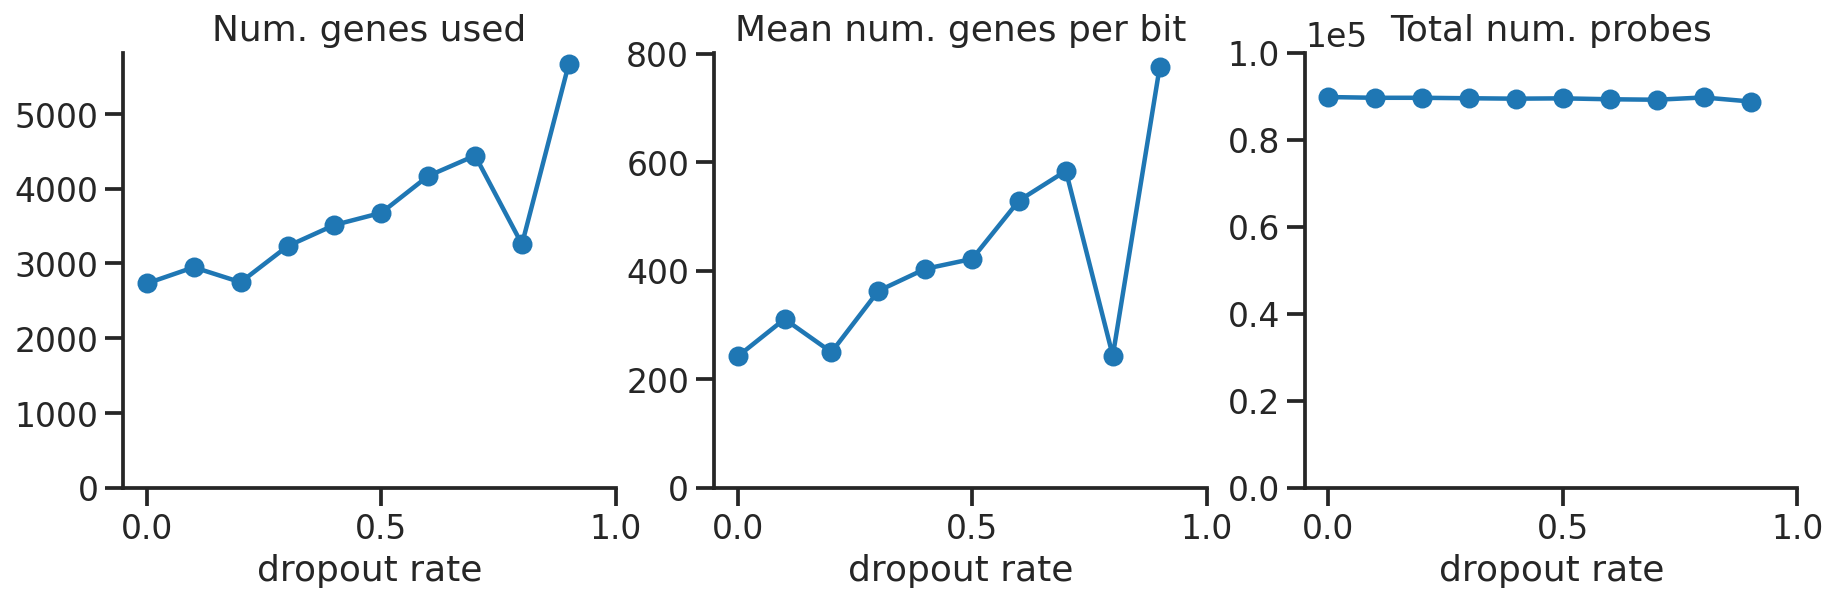

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(3*5,1*4), sharex=True)
ax = axs[0]
ax.plot(drprts, num_g, '-o')
ax.set_ylim(ymin=0)
ax.set_xlabel('dropout rate')
ax.set_title('Num. genes used')
sns.despine(ax=ax)
ax.grid(False)

ax = axs[1]
ax.plot(drprts, mnum_g, '-o')
ax.set_ylim(ymin=0)
ax.set_xlabel('dropout rate')
ax.set_title('Mean num. genes per bit')
sns.despine(ax=ax)
ax.grid(False)

ax = axs[2]
ax.plot(drprts, num_p, '-o')
ax.set_ylim(ymin=0, ymax=1e5)
ax.set_xlabel('dropout rate')
ax.set_title('Total num. probes')
ax.ticklabel_format(axis='y', scilimits=(4,5))
sns.despine(ax=ax)
ax.grid(False)


# ax.set_ylim([0,1])
ax.set_xlim([-0.05,1])
# ax.plot(drprt, np)

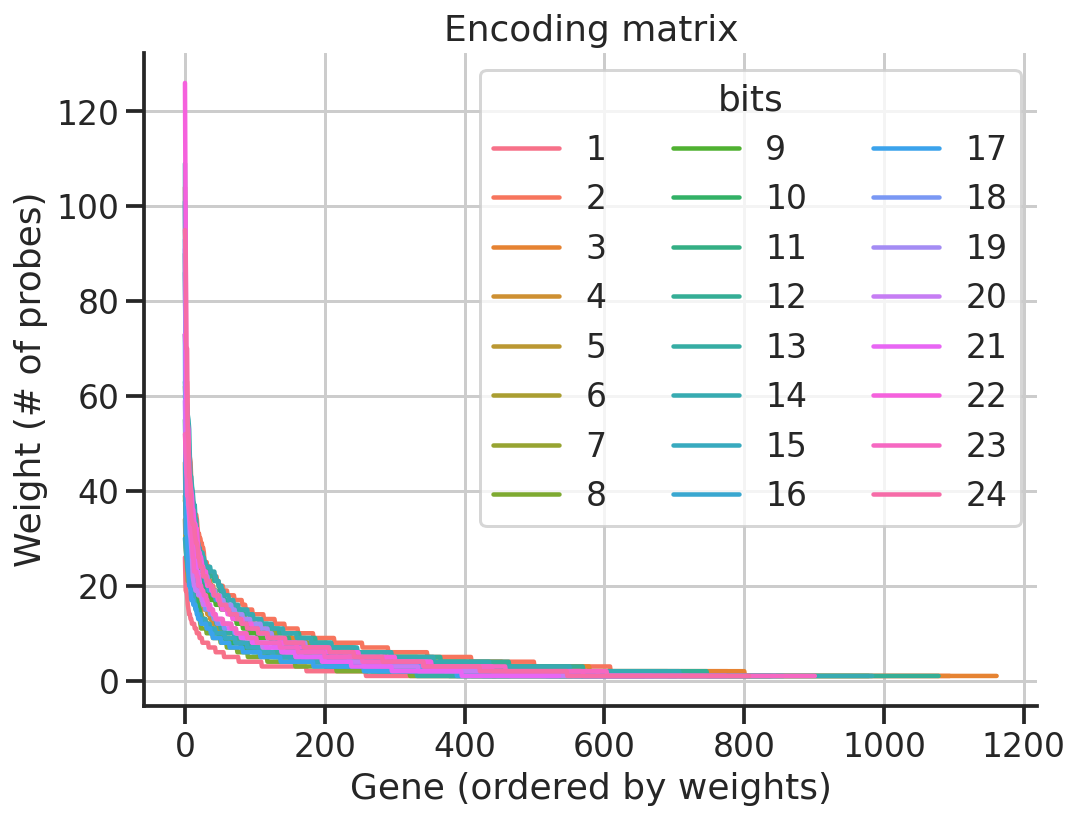

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
for i, col in enumerate(pmat):
    _x = pmat[col]
    _x = np.flip(np.sort(_x[_x>0])) #[:,:,-1]
    ax.plot(_x, color=pm[i], label=f'{i+1}')
ax.set_xlabel('Gene (ordered by weights)')
ax.set_ylabel('Weight (# of probes)')
sns.despine(ax=ax)
ax.set_title('Encoding matrix')
ax.legend(ncol=3, title='bits')

In [20]:
(pmat.sum(axis=1) == 0).sum(), (pmat.sum(axis=1) > 0).sum(), len(pmat)

(5187, 5674, 10861)

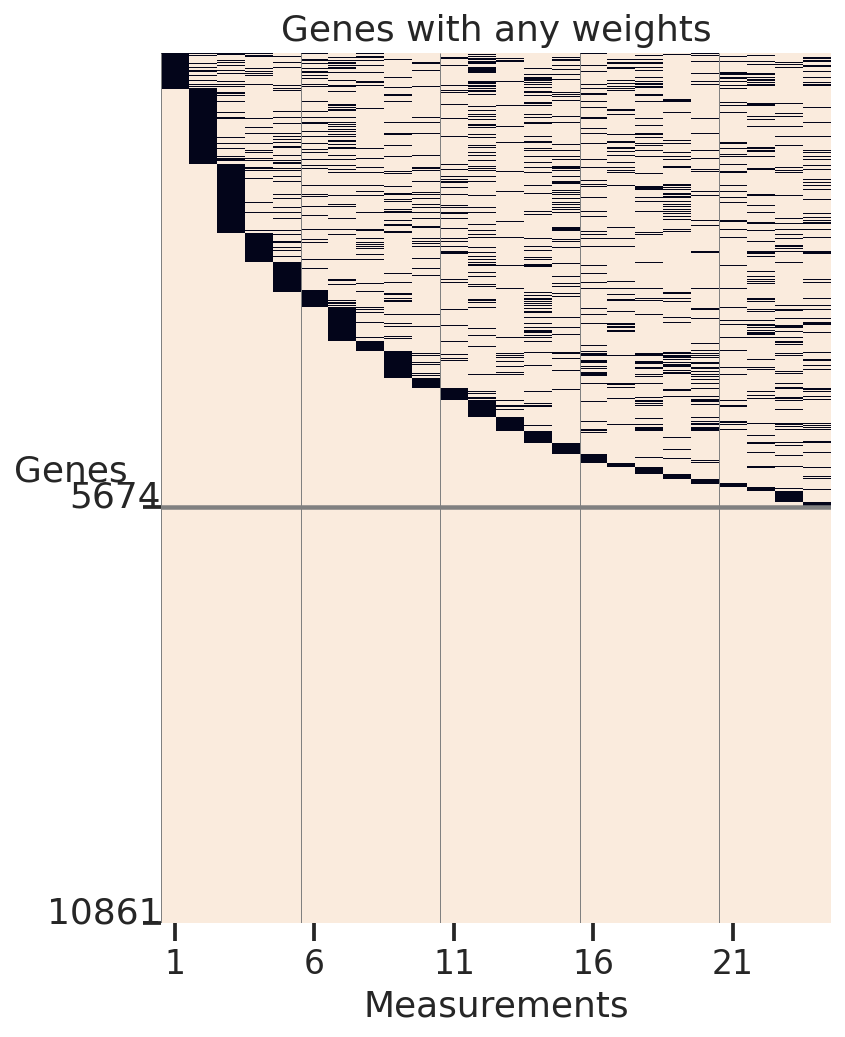

In [21]:
nzero_prbe_cond = pmat.sum(axis=1) > 0
pospmat = pmat[nzero_prbe_cond]
with sns.axes_style('ticks'):
    # zero count does not matter
    bpmat = (pospmat > 0).astype(int)

    _mat, _row, _col = basicu.diag_matrix_rows(bpmat.values)
    _zeromat = pmat[pmat.sum(axis=1) == 0]
    nmat = len(_mat)
    nzeromat = len(_zeromat)
    ntotal = nmat + nzeromat

    fig, ax = plt.subplots(figsize=(6,8))
    sns.heatmap(pd.DataFrame(np.vstack([_mat, _zeromat]), columns=(_col+1)),
                cbar=False,
                xticklabels=5, 
                cmap='rocket_r',
                ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
    ax.set_yticks([nmat, ntotal])
    ax.text(0, nmat, nmat, ha='right')
    ax.text(0, ntotal, ntotal, ha='right')
    
    ax.axhline(nmat, color='gray')
    ax.vlines(np.arange(0,24,5), 0, ntotal, color='gray', linewidth=0.5)
    ax.set_xlabel('Measurements')
    ax.set_ylabel(f'Genes', rotation=0, ha='right')
    ax.set_title('Genes with any weights')
    plt.show()

In [22]:
def plot_binary(pmat, ax):
    nzero_prbe_cond = pmat.sum(axis=1) > 0
    pospmat = pmat[nzero_prbe_cond]
    # with sns.axes_style('ticks'):
        # zero count does not matter
    bpmat = (pospmat > 0).astype(int)

    _mat, _row, _col = basicu.diag_matrix_rows(bpmat.values)
    _zeromat = pmat[pmat.sum(axis=1) == 0]
    nmat = len(_mat)
    nzeromat = len(_zeromat)
    ntotal = nmat + nzeromat

    sns.heatmap(pd.DataFrame(np.vstack([_mat, _zeromat]), columns=(_col+1)),
                cbar=False,
                xticklabels=5, 
                cmap='rocket_r',
                rasterized=True,
                ax=ax)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    # ax.set_xticks([0, 23])

    ax.set_yticks([nmat, ntotal])
    ax.text(0, nmat, nmat, ha='right')
    ax.text(0, ntotal, ntotal, ha='right')

    ax.axhline(nmat, color='gray')
    # ax.vlines(np.arange(0,24,5), 0, ntotal, color='gray', linewidth=0.5)
    ax.set_xlabel('bits')
    # ax.set_ylabel('Genes')
    ax.set_title('Genes with any weights')


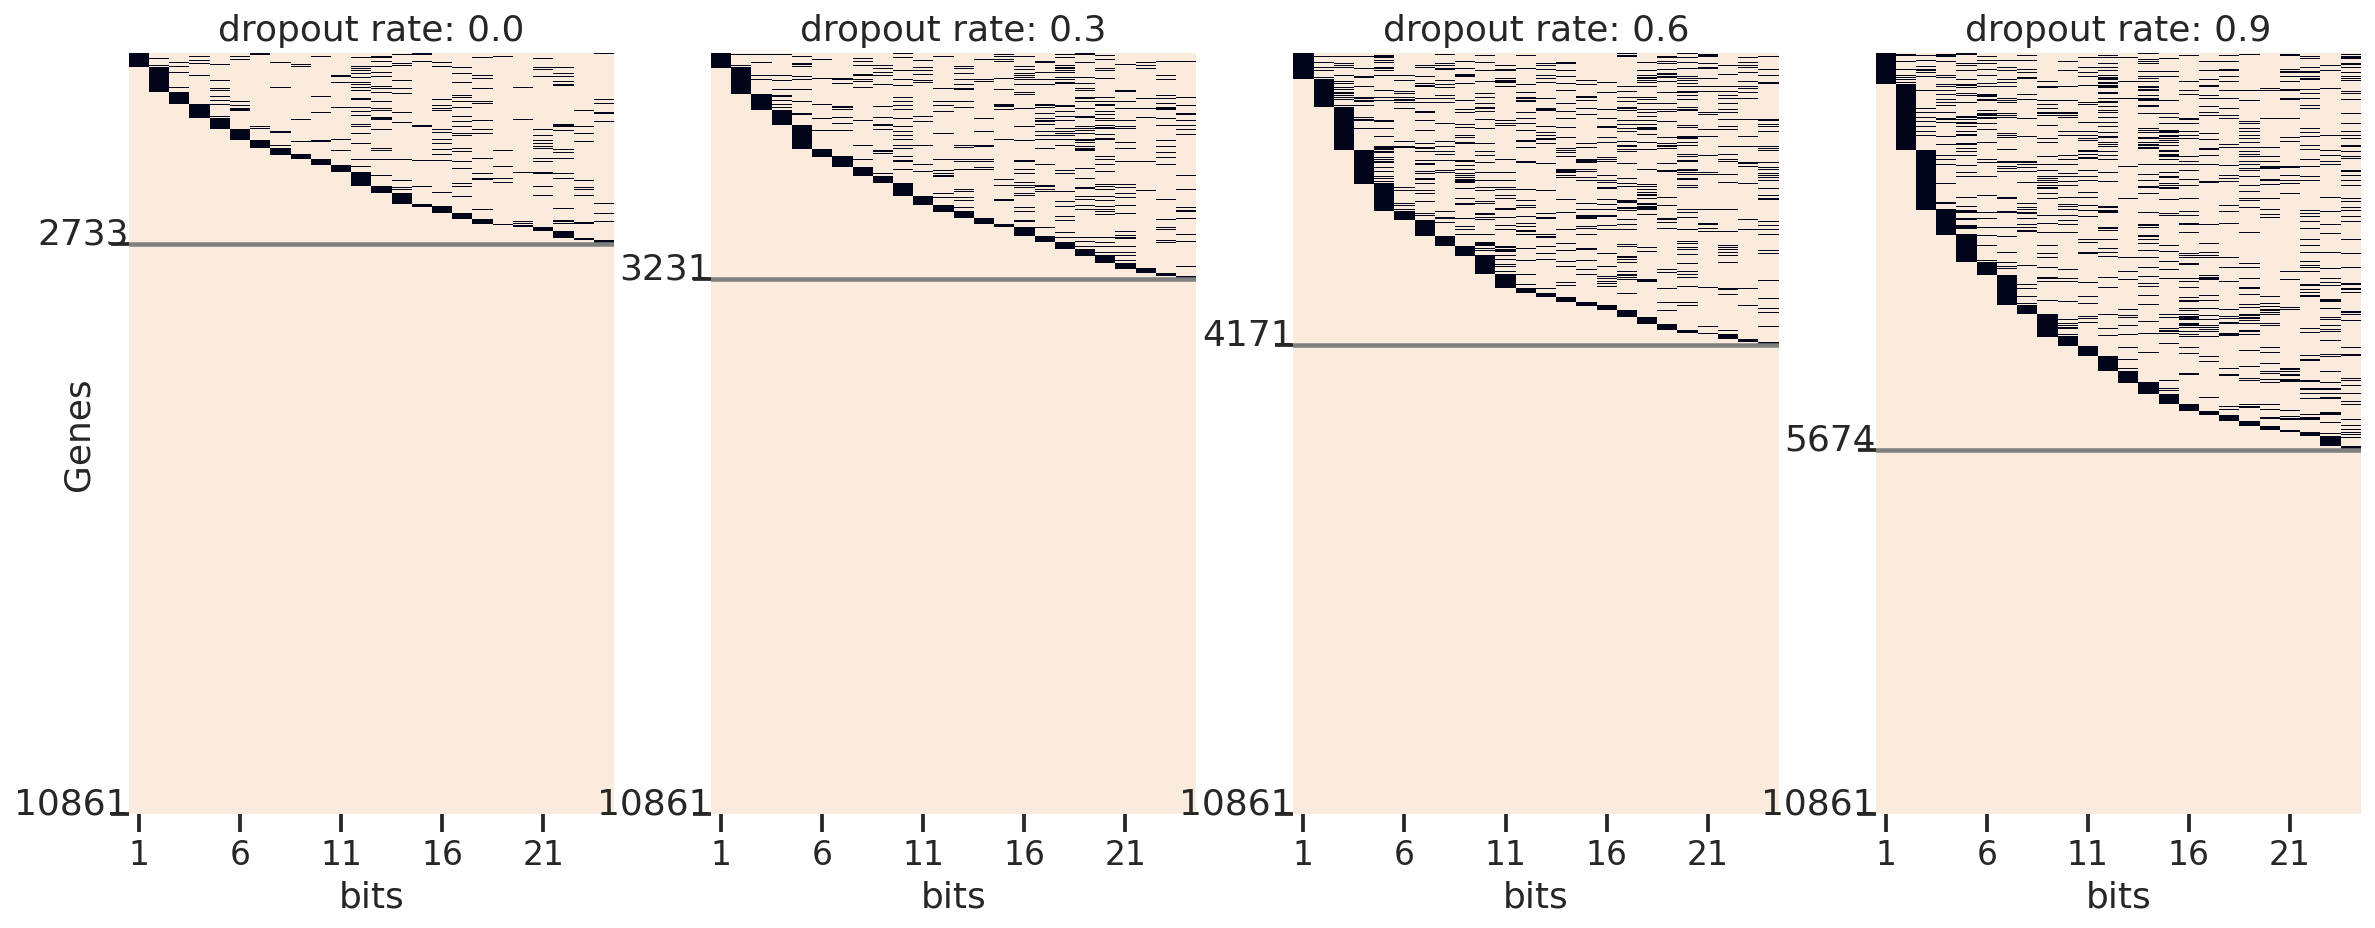

In [23]:
fig, axs = plt.subplots(1, 4, figsize=(5*4,7*1))
for i, drprt in enumerate(drprts[[0,3,6,9]]):
    ax = axs.flat[i]
    pmat = pmats[f'{drprt:.1f}']
    plot_binary(pmat, ax)
    ax.set_title(f'dropout rate: {drprt:.1f}')
    if i == 0:
        ax.set_ylabel('Genes')
plt.show()

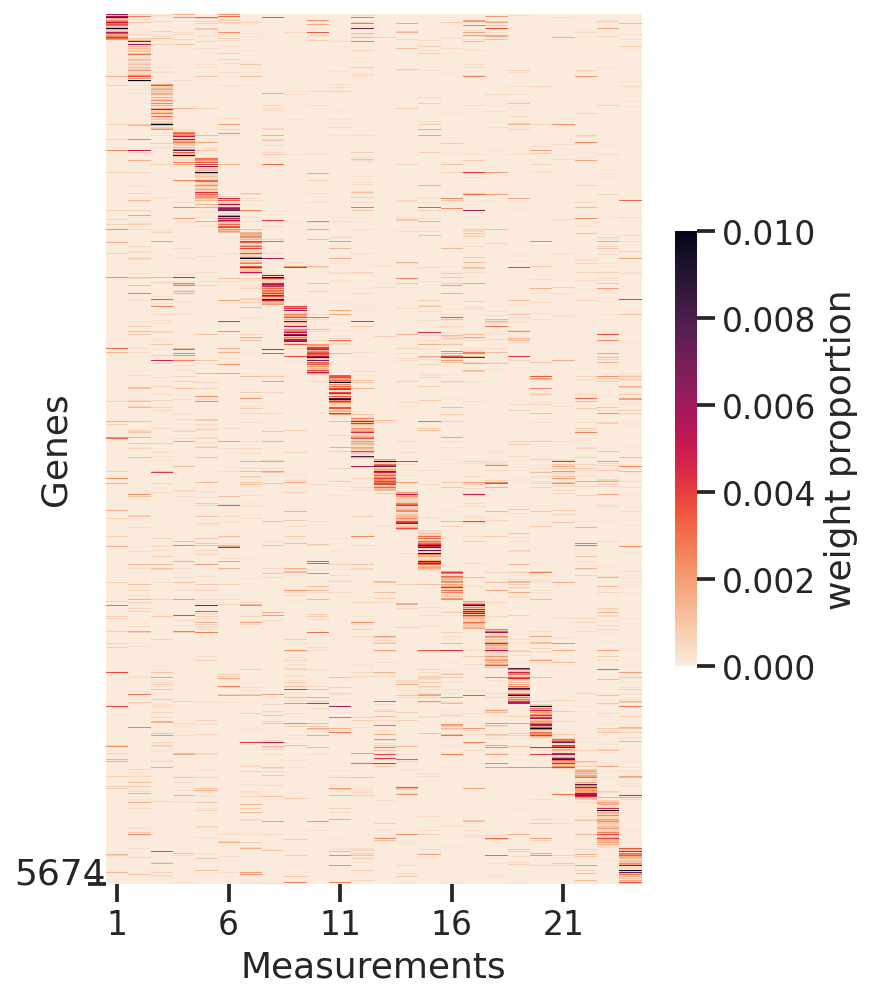

In [24]:
fpmat = pospmat.divide(pospmat.sum(axis=0), axis=1)
# fpmat = np.log(fpmat+1)
# normpmat = np.log10(pmat+1)
with sns.axes_style('ticks'):
    _mat, _row, _col = basicu.diag_matrix_rows(fpmat.values)
    nmat = len(_mat)

    fig, ax = plt.subplots(figsize=(6,8))
    sns.heatmap(pd.DataFrame(_mat, columns=_col+1), 
                xticklabels=5, 
                cmap='rocket_r',
                ax=ax, vmax=0.01, cbar_kws=dict(shrink=0.5, label='weight proportion')
               )
    ax.set_xlabel('Measurements')
    ax.set_ylabel('Genes')
    ax.set_yticks([nmat])
    ax.text(0, nmat, nmat, ha='right')
    plt.show()